# Project: Investigate a Dataset about TMDb movie.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose The Movie Database (TMDb) to analyze. The dataset contains 10866 tuples and 21 attributes.

> Questions:
> <ul>
    <li> Which movie earned the most/least profit? </li>
    <li> What is the average/longest/shortest runtime of the movies? </li>
    <li> In which year the most movies produced? </li>
    <li> What is the most frequent movie genre? </li>
</ul>

In [1]:
# Import statements &  the 'magic word'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

<ul>
    <li> Finds duplicates</li>
    <li> Convert release_date into DateTime format</li>
    <li> Remove unused attributes</li>
    <li> Check the zero cells</li>
</ul>

In [6]:
sum(df.duplicated())

1

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj       

In [9]:
df.drop(['id', 'imdb_id', 'popularity', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
release_year      10865 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 679.1+ KB


In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
budget            10842 non-null int64
revenue           10842 non-null int64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null datetime64[ns]
release_year      10842 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 677.6+ KB


#### Checking the zero values

In [11]:
df.isin([0]).sum()

budget            5674
revenue           5993
original_title       0
runtime             30
genres               0
release_date         0
release_year         0
dtype: int64

In [12]:
df.drop(df[ df['budget'] == 0 ].index, axis=0 , inplace = True)
df.drop(df[ df['revenue'] == 0 ].index, axis=0 , inplace = True)
df.isin([0]).sum()

budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
release_year      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 7 columns):
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
release_year      3854 non-null int64
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 240.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - Which movie earned the most/least profit?

#### Calculate the profit

In [14]:
df.insert(2,'profit',df['revenue']-df['budget'])
df.head()

,budget,revenue,profit,original_title,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015


#### Movie that earned the most profit

In [15]:
pd.DataFrame(df.loc[df['profit'].idxmax()])

,1386
budget,237000000
revenue,2781505847
profit,2544505847
original_title,Avatar
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
release_date,2009-12-10 00:00:00
release_year,2009


#### Movie that earned the least profit

In [16]:
pd.DataFrame(df.loc[df['profit'].idxmin()])

,2244
budget,425000000
revenue,11087569
profit,-413912431
original_title,The Warrior's Way
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
release_date,2010-12-02 00:00:00
release_year,2010


### Research Question 2 - What is the average/longest/shortest runtime of the movies?

#### The average runtime of the movies

In [17]:
df['runtime'].mean()

109.22029060716139

#### The longest runtime of the movies

In [18]:
df['runtime'].max()

338

#### The shortest runtime of the movies

In [19]:
df['runtime'].min()

15

### Research Question 3 - In which year the most movies produced?

In [20]:
def visualizedPlot(data, kind, title, xLabel, yLabel):

    if kind == 'bar':
        data.plot(kind='bar', figsize=(10,4));
    else:
        data.plot(figsize=(10,6));
    
    plt.title(title);
    plt.xlabel(xLabel);
    plt.ylabel(yLabel); 


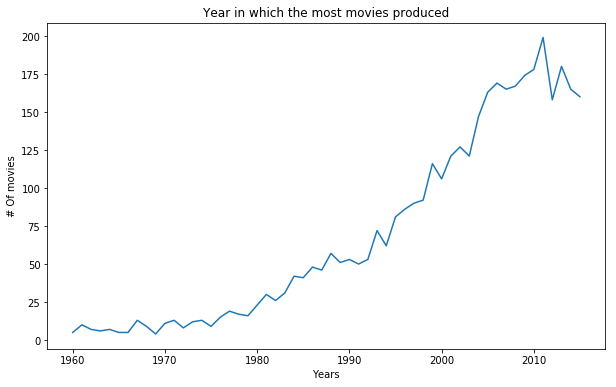

In [21]:

moviesProduced = df.groupby('release_year').count()['original_title']
visualizedPlot(moviesProduced, '', 'Year in which the most movies produced', 'Years', '# Of movies')


> I observe that around 2010 is the year most movies produced.

### Research Question 4 - What is the most frequent movie genre?

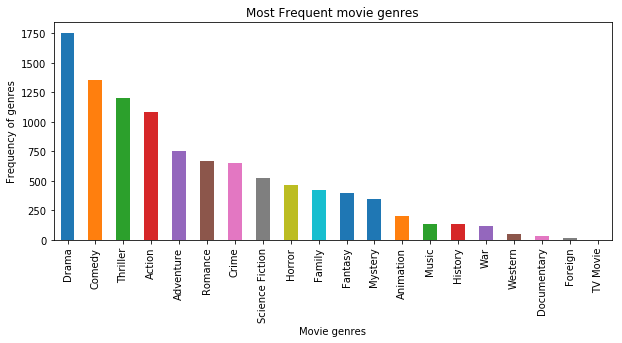

In [22]:
genre=df['genres'].str.cat(sep = '|')
genre=pd.Series(genre.split('|'))
frequentGenre= genre.value_counts(ascending = False)

visualizedPlot(frequentGenre, 'bar', 'Most Frequent movie genres', 'Movie genres', 'Frequency of genres')

> I observe that Drama is the most frequent movie genre

<a id='conclusions'></a>
## Conclusions

>After analyzing the Movie Database (TMDb) I observed that:
><ul>
    <li> The movie that earned the most profit was Avatar, the movie that earned the least profit (loss) was The Warrior's Way.
    <li> The runtime of the movies was:
        <ul>
            <li> The average time - 109 minutes.
            <li> The longest time - 338 minutes.
            <li> The shortest time - 15 minutes.
        </ul>
    <li> The year where most movies were produced was 2010.
    <li> Drama is the most frequent movie genre.
</ul>


>**Limitations**: The dataset has no description which makes it hard to understand the attributes. Also, there are so many zero cells that make it inaccurate. 

## Submitting your Project 

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0